# Exploring SAT Trends – A Deep Dive into NYC High School Data (Part I)

## Table of Contents

- [1. Data Cleaning Walkthrough – Finding and Exploring the Data](#1.-Data-Cleaning-Walkthrough-–-Finding-and-Exploring-the-Data)
    - [1.1. Finding All of the Relevant Datasets](#1.1.-Finding-All-of-the-Relevant-Datasets)
    - [1.2. Finding Background Information](#1.2.-Finding-Background-Information)
    - [1.3. Reading in and Exploring the CSV Files](#1.3.-Reading-in-and-Exploring-the-CSV-Files)
    - [1.4. Reading in and Cleaning the Survey Data](#1.4.-Reading-in-and-Cleaning-the-Survey-Data)
    - [1.5. Inserting DBN Fields](#1.5.-Inserting-DBN-Fields)
    - [1.6. Combining the SAT Scores](#1.6.-Combining-the-SAT-Scores)
    - [1.7. Parsing Geographic Coordinates for Schools](#1.7.-Parsing-Geographic-Coordinates-for-Schools)

- [2. Data Cleaning Walkthrough – Combining the Data](#2.-Data-Cleaning-Walkthrough-–-Combining-the-Data)
    - [2.1. Condensing the Class Size Dataset](#2.1.-Condensing-the-Class-Size-Dataset)
    - [2.2. Computing Average Class Sizes](#2.2.-Computing-Average-Class-Sizes)
    - [2.3. Condensing the Demographics and Graduation Datasets](#2.3.-Condensing-the-Demographics-and-Graduation-Datasets)
    - [2.4. Converting AP Test Scores](#2.4.-Converting-AP-Test-Scores)
    - [2.5. Combining the Datasets and Filling in Missing Values](#2.5.-Combining-the-Datasets-and-Filling-in-Missing-Values)
    - [2.6. Adding a School District Column for Mapping](#2.6.-Adding-a-School-District-Column-for-Mapping)
    
- [3. Data Cleaning Walkthrough – Analyzing and Visualizing the Data](#3.-Data-Cleaning-Walkthrough-–-Analyzing-and-Visualizing-the-Data)
    - [3.1. Finding Correlations](#3.1.-Finding-Correlations)
    - [3.2. Plotting Enrollment](#3.2.-Plotting-Enrollment)
    - [3.3. Exploring Schools with Low SAT Scores and Enrollment](#3.3.-Exploring-Schools-with-Low-SAT-Scores-and-Enrollment)
    - [3.4. Plotting Language Learning Percentage](#3.4.-Plotting-Language-Learning-Percentage)
    - [3.5. Calculating District-Level Statistics](#3.5.-Calculating-District-Level-Statistics)

- [4. Conclusion](#4.-Conclusion)    

## 1. Data Cleaning Walkthrough – Finding and Exploring the Data

### 1.1. Finding All of the Relevant Datasets

In this project, we'll explore the correlation between [SAT](https://en.wikipedia.org/wiki/SAT) scores and demographics like race, gender, and income. Our investigation will delve into the controversial efficacy of standardized tests and their potential biases against certain groups in the U.S. educational system.

The [SAT](https://en.wikipedia.org/wiki/SAT), or Scholastic Aptitude Test, is a standardized exam that U.S. high school students take for college admissions. The test consists of three sections, each worth `800` points, totaling `2,400` possible points. While the combined score has changed a few times, the dataset for our project is based on `2,400` total points. It's important to note that organizations frequently rank high schools based on their average SAT scores, using them as a measure of overall school district quality.

New York City shares high school [SAT scores](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) data online, along with [demographics](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2) for each high school. Unfortunately, combining this data alone won't provide all the demographic information we need. Therefore, we'll have to supplement our data with additional sources for our full analysis. The [NYC Open Data](https://opendata.cityofnewyork.us/) website provides several related datasets covering demographic information and test scores. Here are the links to all of the datasets we'll be using:

* [SAT scores by school](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) – SAT scores for each high school in New York City.
* [School attendance](https://data.cityofnewyork.us/Education/2010-2011-School-Attendance-and-Enrollment-Statist/7z8d-msnt) – attendance information for each high school.
* [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) – class size information for each high school.
* [AP test results](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e) – Advanced Placement (AP) exam results for each high school.
* [Graduation outcomes](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a) – the percentage of students who graduated, and other outcome information.
* [Demographics](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j) – demographic information for each high school.
* [School survey](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) – surveys of parents, teachers, and students at each high school.

All of these datasets are interrelated. We'll need to combine them into a single dataset before we can find correlations.

### 1.2. Finding Background Information

A thorough understanding of the data helps us avoid costly mistakes, such as misinterpreting a column's content. Additionally, background research provides insight into how to effectively combine and analyze the data. In our case, it's essential to research:

- [New York City](https://en.wikipedia.org/wiki/New_York_City).
- [The SAT](https://en.wikipedia.org/wiki/SAT).
- [Schools in NYC](https://en.wikipedia.org/wiki/List_of_high_schools_in_New_York_City).
- [The data](https://data.cityofnewyork.us/browse?category=Education).

There are several insights we can gather from these resources:

- New York City comprises five boroughs, each serving as a distinct region.
- The city's schools are spread across various school districts, with each district often containing numerous schools.
- Our datasets encompass various types of schools. We'll need to refine them to focus solely on high schools, as only their students take the SAT.
- Each school in New York City is identified by a unique code known as a `DBN`, or District Borough Number.
- Aggregating data by district enables us to utilize district mapping data and examine differences across districts.

### 1.3. Reading in and Exploring the CSV Files

After completing our background research, we're ready to read in the data files:

* `ap_2010.csv` - data on [AP test results](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e).
* `class_size.csv` - data on [class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3).
* `demographics.csv` - data on [demographics](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j).
* `graduation.csv` - data on [graduation outcomes](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a).
* `hs_directory.csv` - a directory of [high schools](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2).
* `sat_results.csv` - data on [SAT scores](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4).
* `survey_all.txt` - data on [surveys](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) from all schools.
* `survey_d75.txt` - data on [surveys](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) from New York City [district 75](https://www.schools.nyc.gov/learning/special-education/school-settings/district-75).

The files `survey_all.txt` and `survey_d75.txt` are in more complicated formats than the others. For now, we'll focus on reading in the `CSV` files only and then explore them.

In [1]:
# Import the relevant libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# Set the display format for float values
pd.options.display.float_format = '{:.2f}'.format

# List the CSV files to read
data_files = ["ap_2010.csv",
              "class_size.csv",
              "demographics.csv",
              "graduation.csv",
              "hs_directory.csv",
              "sat_results.csv"]

# Store data from each CSV file
data = {}

# Loop through each CSV file and read its contents into a DataFrame,
# then store the DataFrame in the data dictionary with the file name (without extension) as the key
for file in data_files:
    dict_value = pd.read_csv("Datasets/Schools/{}".format(file))
    dict_key = file.replace(".csv", "")
    data[dict_key] = dict_value

We're mainly interested in exploring the SAT dataset to understand the structure of the data. The SAT dataset corresponds to the dictionary key `sat_results`, and also contains the average SAT scores for each high school in New York City. Eventually, we want to study the correlation of selected information from this dataset with information in the other datasets.

In [2]:
# Display the first few rows of the SAT dataset
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


We can derive several insights from this output:

- The dataset seems to exclusively include information about high schools.
- Each high school in NYC is uniquely identified by its `DBN` in the SAT dataset.
- It would be beneficial to merge the three columns containing SAT scores – `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, and `SAT Writing Avg. Score` – into a single column for easier analysis.

Given these observations, let's explore the other datasets to see if we can gain any insight into how to combine them.

In [3]:
# Display the first 3 rows of each dataset in the data dictionary
for key in data:
    print(f"First 3 rows of the '{key}' DataFrame:")
    print()
    print(data[key].head(3), end='\n\n\n')

First 3 rows of the 'ap_2010' DataFrame:

      DBN                    SchoolName AP Test Takers  Total Exams Taken  \
0  01M448  UNIVERSITY NEIGHBORHOOD H.S.              39                49   
1  01M450        EAST SIDE COMMUNITY HS              19                21   
2  01M515           LOWER EASTSIDE PREP              24                26   

  Number of Exams with scores 3 4 or 5  
0                                   10  
1                                    s  
2                                   24  


First 3 rows of the 'class_size' DataFrame:

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -             

We can make a couple of observations based on the first three rows of each DataFrame:

- Each dataset appears to either have a `DBN` column or the information necessary to create one; this means we can use a `DBN` column to combine the datasets. We can pinpoint matching rows from different datasets by looking for identical District Borough Numbers, then group all of their columns together in a single dataset.
- The `Location 1` column looks interesting for mapping, as it contains coordinates within a larger string.
- Some of the datasets appear to contain multiple rows for each school and thus duplicate `DBN` values. This means we’ll have to ensure each `DBN` is unique within each dataset. Otherwise, we'll face issues when we combine the datasets, as we might be merging multiple rows in one dataset with a single row in another dataset.

Before we proceed with the merge, we should make sure we acquired all the data we want to unify.

### 1.4. Reading in and Cleaning the Survey Data

The files `survey_all.txt` and `survey_d75.txt` are tab-delimited and encoded with `Windows-1252` encoding. Encoding determines how a computer stores a file's contents in binary. Since `Windows-1252` is uncommon, it can lead to errors if not specified when reading the survey files. After reading the survey data, we'll merge it into a single DataFrame.

In [4]:
# Read the survey data from 'survey_all.txt' and 'survey_d75.txt' files
all_survey = pd.read_csv("Datasets/Schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("Datasets/Schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')

# Concatenate the survey data from both files into a single DataFrame
survey = pd.concat([all_survey, d75_survey]).copy()
survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.00,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.00,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.00,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.00,Elementary / Middle School,89.00,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.00,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are two immediate facts that we can observe in the data:

- There are `2,773` columns, nearly all of which are irrelevant to our analysis. Thus, we'll have to filter the data to remove the unnecessary ones, as working with fewer columns makes it easier to print a dataset's output.
- The survey data has a `dbn` column that we'll want to convert to uppercase for consistency with the other datasets, renaming it to `DBN`.

To remove unnecessary columns, we can utilize the data dictionary provided in the `Attachments` section of this [link](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8). In addition to `DBN`, we'll select columns that provide aggregate survey data about how parents, teachers, and students feel about aspects such as school safety and academic performance.

In [5]:
# Copy the 'dbn' column to 'DBN' in the survey dataset
survey["DBN"] = survey["dbn"]

# Select the relevant survey fields
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", 
                 "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", 
                 "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", 
                 "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", 
                 "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

# Subset the survey DataFrame with `survey_fields`, then store the subset in the data dictionary
survey = survey.loc[:, survey_fields]
data["survey"] = survey

### 1.5. Inserting DBN Fields

When we explored all of the DataFrames, we noticed that some of them such as `class_size` and `hs_directory` don't have a `DBN` column. However, `hs_directory` has a `dbn` column that we can simply rename to `DBN`. Now, let's compare `class_size` with the `sat_results` dataset, which contains a `DBN` column.

In [6]:
# Print the first 3 rows of the 'class_size' and 'sat_results' datasets
print(data["class_size"].head(3))
print()
print(data["sat_results"].head(3))

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \
0                           -                              19.00   
1                           -                              21.00   
2                           -                              17.00   

   NUMBER OF SECTIONS  AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  \
0                1.00               

From looking at these rows, we can tell that the `DBN` in the `sat_results` data is just a combination of the `CSD` and `SCHOOL CODE` columns in the `class_size` data. The main difference is that the `DBN` is padded in `sat_results`  that the `CSD` portion of it always consists of two digits. Therefore, we'll need to add a leading `0` to the `CSD` if it's less than two digits long in `class_size`.

Once we've padded the `CSD`, we can use the addition operator (`+`) to combine the values in the `CSD` and `SCHOOL CODE` columns in the `class_size` DataFrame.

In [7]:
# Rename the 'dbn' column to 'DBN' in the 'hs_directory' dataset
data["hs_directory"].rename({'dbn': 'DBN'}, axis=1, inplace=True)

# Define a function to pad CSD numbers
def pad_csd(num):
    return str(num).zfill(2)
    
# Apply padding to CSD numbers and combine with 'SCHOOL CODE' to create DBN
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

# Display the first 3 rows of the updated 'class_size' DataFrame
data['class_size'].head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.00,1.00,19.00,19.00,19.00,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.00,1.00,21.00,21.00,21.00,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.00,1.00,17.00,17.00,17.00,ATS,NaN,01,01M015


### 1.6. Combining the SAT Scores

Let's create a new column that sums up the SAT scores for the different sections of the exam. This will make it easier to study the correlation between the scores and demographic factors as we'll be working with a single number, rather than three different ones.

Before performing this operation, we'll need to convert the `SAT Math Avg. Score`, `SAT Critical Reading Avg. Score`, and `SAT Writing Avg. Score` columns in the `sat_results` dataset from the object (string) to a numeric data type.

In [8]:
# Convert SAT score columns to numeric data type,
# and treat invalid strings that can't be converted to numerical values as missing values
sat_fields = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']

for column in sat_fields:
    data["sat_results"][column] = pd.to_numeric(data["sat_results"][column], errors="coerce")

# Calculate the total SAT score by summing up scores from different sections
data['sat_results']['sat_score'] = (data['sat_results'][sat_fields[0]] + 
                                    data['sat_results'][sat_fields[1]] + 
                                    data['sat_results'][sat_fields[2]])

# Display the first few rows of the total SAT scores
print(data['sat_results']['sat_score'].head())

0   1122.00
1   1172.00
2   1149.00
3   1174.00
4   1207.00
Name: sat_score, dtype: float64


### 1.7. Parsing Geographic Coordinates for Schools

Parsing the latitude and longitude coordinates for each school will enable us to map the schools and uncover any geographic patterns in the data. Currently, the coordinates are in the text field `Location 1` in the `hs_directory` dataset.

In [9]:
# Extract the first entry in the 'Location 1' column
data['hs_directory']['Location 1'].iloc[0]

'883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)'

In [10]:
# Define functions to extract latitude and longitude from the 'Location 1' column
def latitude(location):
    coords = re.findall("\(.+\)", location)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def longitude(location):
    coords = re.search("\(.+\)", location)
    long = coords[0].split(",")[1].replace(")", "")
    return long

# Apply `latitude` and `longitude` functions to 'Location 1', and create new 'lat' and 'long' columns
data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(latitude)
data["hs_directory"]["long"] = data["hs_directory"]["Location 1"].apply(longitude)

# Convert 'lat' and 'long' columns to numeric data type
# and treat invalid strings that can't be converted as missing values
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["long"] = pd.to_numeric(data["hs_directory"]["long"], errors="coerce")

# Display the first 3 rows of the updated 'hs_directory' DataFrame
data['hs_directory'].head(3)

,DBN,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,long
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",40.67,-73.96
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",40.83,-73.90
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",40.84,-73.92


So far, we've progressed from selecting a topic for our project, obtaining various datasets about NYC public schools, to having clean data nearly ready to merge using the `DBN` column. Currently, all datasets are stored in the `data` dictionary, each being a pandas DataFrame.

Along the way, we've managed files with different formats and columns, prepared for merging multiple files, converted columns from strings to numerical values, and employed text processing to extract coordinates from a string.

## 2. Data Cleaning Walkthrough – Combining the Data

### 2.1. Condensing the Class Size Dataset

The first step in preparing for the merge is to condense datasets like `class_size` that have duplicate `DBN` values. We need to ensure that each value in the `DBN` column is unique.

Although the primary dataset we want to analyze, `sat_results`, has unique `DBN` values for every high school in New York City, a single row in `sat_results` may correspond to multiple rows in the `class_size` dataset. This scenario creates challenges because we must determine which of the multiple entries in `class_size` should be combined with the single matching entry in `sat_results`.

In [11]:
# Display the first 3 rows of the 'class_size' dataset
data["class_size"].head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.00,1.00,19.00,19.00,19.00,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.00,1.00,21.00,21.00,21.00,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.00,1.00,17.00,17.00,17.00,ATS,NaN,01,01M015


The appearance of the same `DBN` value in the first few rows suggests the rows belong to the same school. Also, it looks like each school has multiple values for `GRADE`, `PROGRAM TYPE`, `CORE SUBJECT (MS CORE and 9-12 ONLY)`, and `CORE COURSE (MS CORE and 9-12 ONLY)`.

Now, let's look at the unique values for both `GRADE` and `PROGRAM TYPE`.

In [12]:
# Display unique values in the 'GRADE' and 'PROGRAM TYPE' columns
print(data["class_size"]['GRADE '].unique(), end='\n\n')
print(data["class_size"]['PROGRAM TYPE'].unique())

['0K' '01' '02' '03' '04' '05' '0K-09' nan '06' '07' '08' 'MS Core'
 '09-12' '09']

['GEN ED' 'CTT' 'SPEC ED' nan 'G&T']


Since our focus is on high schools, we're only concerned with grades `9` through `12`. Thus, we'll select rows where the `GRADE` column indicates the range `09-12`. Moreover, each school may offer various program types, and since `GEN ED` is predominant, we'll also select rows with `PROGRAM TYPE` as `GEN ED`.

In [13]:
# Extract the 'class_size' dataset
class_size = data["class_size"]

# Filter rows where the grade indicates "09-12" and the program type is "GEN ED"
class_size = class_size[(class_size["GRADE "] == "09-12") & (class_size["PROGRAM TYPE"] == "GEN ED")]
class_size.head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.00,3.00,21.00,19.00,25.00,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.00,3.00,26.30,24.00,31.00,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.00,2.00,19.00,16.00,22.00,STARS,NaN,01,01M292


### 2.2. Computing Average Class Sizes

The `DBN` values still aren't unique due to the `CORE COURSE (MS CORE and 9-12 ONLY)` and `CORE SUBJECT (MS CORE and 9-12 ONLY)` columns. These columns seem to pertain to different kinds of classes.

In [14]:
# Display unique values in the 'CORE COURSE (MS CORE and 9-12 ONLY)' 
# and 'CORE SUBJECT (MS CORE and 9-12 ONLY)' columns
print(data["class_size"]['CORE COURSE (MS CORE and 9-12 ONLY)'].unique(), end='\n\n')
print(data["class_size"]['CORE SUBJECT (MS CORE and 9-12 ONLY)'].unique())

['-' nan 'MS English Core' 'MS Math Core' 'MS Science Core'
 'MS Social Studies Core' 'Global History & Geography'
 'Integrated Algebra' 'Living Environment' 'Participation in Government'
 'US History & Government' 'English 9' 'English 10' 'English 11'
 'English 12' 'Geometry' 'Other Math' 'Earth Science' 'Chemistry'
 'Physics' 'Other Science' 'Other English' 'Trigonometry' 'Math A'
 'Economics' 'Other Social Studies' 'Math B']

['-' nan 'ENGLISH' 'MATH' 'SCIENCE' 'SOCIAL STUDIES']


The column `CORE SUBJECT (MS CORE and 9-12 ONLY)` appears to contain only certain subjects. Since we aim to include all classes offered by a high school, we'll group the `class_size` dataset by the `DBN` column and apply the mean function to each group, resulting in a new DataFrame with the aggregated results.

In [15]:
# Select numeric columns and copy the 'DBN' column
class_size_numeric = class_size.select_dtypes(include=['number'])
class_size_numeric["DBN"] = class_size["DBN"]

# Group by 'DBN', calculate the mean for each group, and reset the index to make 'DBN' a column again
class_size_numeric = class_size_numeric.groupby("DBN").agg(np.mean)
class_size_numeric = class_size_numeric.reset_index()

# Update the 'class_size' dataset in the data dictionary
data["class_size"] = class_size_numeric
data["class_size"].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1.00,88.00,4.00,22.56,18.50,26.57,NaN
1,01M332,1.00,46.00,2.00,22.00,21.00,23.50,NaN
2,01M378,1.00,33.00,1.00,33.00,33.00,33.00,NaN
3,01M448,1.00,105.69,4.75,22.23,18.25,27.06,NaN
4,01M450,1.00,57.60,2.73,21.20,19.40,22.87,NaN


### 2.3. Condensing the Demographics and Graduation Datasets

Now that we've finished condensing `class_size`, let's condense the `demographics` and `graduation` DataFrames. In the case of `demographics`, the only column that prevents a given `DBN` from being unique is `schoolyear`. Selecting rows where `schoolyear` is `20112012` will give us the most recent year of data, and also match our SAT results data.

In [16]:
# Filter demographics data for the most recent school year (2011–2012)
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]
data["demographics"].head(3)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.40,189,13,31,35,28,...,63,33.30,109,57.70,4,2.10,97.00,51.30,92.00,48.70
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.50,328,32,46,52,54,...,81,24.70,158,48.20,28,8.50,147.00,44.80,181.00,55.20
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.50,626,52,102,121,87,...,55,8.80,357,57.00,16,2.60,330.00,52.70,296.00,47.30


In the case of the `graduation` dataset, the `Demographic` and `Cohort` columns are what prevent `DBN` from being unique. A cohort appears to represent the year of the data, and the demographic refers to a specific demographic group. 

Therefore, we want to select data from the most recent cohort available, which is `2006`. Additionally, we're interested in data from the full cohort, so we'll only choose rows where `Demographic` is `Total Cohort`.

In [17]:
# Filter the graduation dataset to select data 
# from the most recent cohort (2006) and the full cohort (Total Cohort)
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

# Display the first 3 rows
data["graduation"].head(3)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%


### 2.4. Converting AP Test Scores

The last step before combining all of the datasets is to convert the [Advanced Placement](https://en.wikipedia.org/wiki/Advanced_Placement_exams) (AP) test scores from strings to numeric values. High school students can take several AP exams before applying to college, with each exam corresponding to a school subject.

Students who earn high scores on these exams may receive college credit. Given this, it will be interesting to investigate whether AP exam scores are correlated with SAT scores across high schools.

In [18]:
# Remove the space in the "AP Test Takers " column of the 'ap_2010' dataset
data["ap_2010"].rename(columns={"AP Test Takers ": "AP Test Takers"}, inplace=True)

# List the columns containing AP test data, and initialize the field number
ap_fields = ['AP Test Takers', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
field_num = 1

# Loop through each column in `ap_fields`
for column in ap_fields:
    
    # Convert the column to numeric values,
    # and treat invalid strings that can't be converted as missing values
    data["ap_2010"][column] = pd.to_numeric(data["ap_2010"][column], errors="coerce")

    # Print the data type of the current column, then increment the field number
    print(f"The datatype of the {field_num}st column is: {data['ap_2010'][column].dtype}")
    field_num += 1

The datatype of the 1st column is: float64
The datatype of the 2st column is: float64
The datatype of the 3st column is: float64


### 2.5. Combining the Datasets and Filling in Missing Values

To combine our data, we'll use the `DBN` column to identify matching rows across datasets. Also, we'll merge two datasets at a time until we've merged all of them. Hence, each row will have columns from all of the datasets.

We can use four types of joins – `left`, `right`, `inner`, and `outer`. Each of these dictates how pandas combines the rows, so the merge strategy we pick will affect the final number of rows. Depending on the strategy we choose, we may either preserve rows at the expense of having more missing data, or minimize missing data at the expense of having fewer rows.

Since our project is concerned with determining demographic factors that correlate with SAT score, we'll want to preserve as many rows as possible from `sat_results` while minimizing null values. As a result, we may need to use various merge strategies with different datasets:

- For the datasets which have a lot of missing `DBN` values, a `left` join can be more appropriate, because we don't want to lose too many rows when we merge. If we perform an `inner` join, we will lose data from many high schools.
- Some datasets have `DBN` values that are almost identical to those in the `sat_results` DataFrame. Thus, we'll employ an `inner` join to get rid of missing data.

To begin, both the `ap_2010` and `graduation` datasets contain numerous missing `DBN` values, necessitating a `left` join when merging them with `sat_results`. By employing a `left join`, our resultant DataFrame will retain all the `DBN` values from the original `sat_results` DataFrame.

In [19]:
# Start with the 'sat_results' dataset
combined = data["sat_results"]

# Merge with the 'ap_2010' then the 'graduation' dataset on the 'DBN' column using a left join
combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

# Display the shape of the combined dataset and the first 3 rows
print(combined.shape, end="\n\n")
print(combined.head(3))

(479, 33)

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                           355.00   
1                     91                           383.00   
2                     70                           377.00   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0               404.00                  363.00    1122.00   
1               423.00                  366.00    1172.00   
2               402.00                  370.00    1149.00   

                     SchoolName  AP Test Takers  Total Exams Taken  ...  \
0                           NaN             NaN                NaN  ...   
1  UNIVERSITY NEIGHBORHOOD H.S.           39.00              49.00  ...   
2        EAST SIDE COMMUNITY HS  

Now that we've performed the `left` joins, we still have to merge `class_size`, `demographics`, `survey`, and `hs_directory` into the combined dataset. Since these files contain information that's more valuable to our analysis and have fewer missing `DBN` values, we'll use the `inner` join type.

In [20]:
# Merge each dataset from `to_merge` list into `combined` using an inner join
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")
    
# Display the shape of the combined DataFrame and the first 3 rows
print(combined.shape, end='\n\n')
print(combined.head(3))

(363, 158)

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                           355.00   
1                     91                           383.00   
2                     70                           377.00   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0               404.00                  363.00    1122.00   
1               423.00                  366.00    1172.00   
2               402.00                  370.00    1149.00   

                     SchoolName  AP Test Takers  Total Exams Taken  ...  \
0                           NaN             NaN                NaN  ...   
1  UNIVERSITY NEIGHBORHOOD H.S.           39.00              49.00  ...   
2        EAST SIDE COMMUNITY HS 

The `inner` joins led to a reduction of `116` rows in `sat_results` due to the absence of corresponding `DBN` values in the other datasets. Additionally, numerous columns now contain null values because of the `left` joins. If we hadn't opted for `left` joins, many rows with missing data would have been discarded, significantly reducing the number of high schools in our dataset.

Next, we'll fill in the missing values with the means of their respective columns for numerical data, and use `Unknown` for categorical data. This approach will allow us to proceed with analyses that can't handle missing values like correlations.

In [21]:
# Define a function to fill missing values with the mean for numerical columns
def fillna_mean(column):
    if pd.api.types.is_numeric_dtype(column):  # If the column's data type is numerical
        return column.fillna(column.mean())    # Fill missing values with the column mean
    else:
        return column  # Return column as is for non-numerical columns

# Apply the `fillna_mean` function to the combined DataFrame
combined = combined.apply(fillna_mean)

# Fill the remaining missing values with 'Unknown', then display the first 3 rows
combined = combined.fillna('Unknown')
combined.head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,long
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.00,404.00,363.00,1122.00,Unknown,129.03,197.04,...,Then to Manhattan students or residents,Then to New York City residents,Unknown,Unknown,Unknown,Unknown,Unknown,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.71,-73.99
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.00,423.00,366.00,1172.00,UNIVERSITY NEIGHBORHOOD H.S.,39.00,49.00,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.71,-73.98
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.00,402.00,370.00,1149.00,EAST SIDE COMMUNITY HS,19.00,21.00,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.73,-73.98


### 2.6. Adding a School District Column for Mapping

Eventually, we've completed cleaning and combining our data. Mapping out the statistics on a school district level could be an interesting analysis approach. Thus, adding a column to the dataset that specifies the school district can facilitate this task.

Since the school district is represented by the first two characters of the `DBN` column, we can apply a function to `DBN` to extract these characters.

In [22]:
# Extract the first two characters from the DBN column to represent the school district
combined["school_dist"] = combined["DBN"].apply(lambda dbn: dbn[0:2])
combined['school_dist'].head()

C:\Users\Gordias\AppData\Local\Temp\ipykernel_4376\1520180110.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined["school_dist"] = combined["DBN"].apply(lambda dbn: dbn[0:2])


0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

So far, we've transformed several messy datasets into one clean and unified dataset, prepared for analysis. Throughout the process, we addressed missing values, condensed datasets, explored different types of merges, and calculated mean averages across DataFrames. Now, we're ready to delve into our refined dataset, examining correlations and creating maps.

## 3. Data Cleaning Walkthrough – Analyzing and Visualizing the Data

### 3.1. Finding Correlations

The first thing we'll do is find any correlations between the SAT score and the other columns. This will help us determine which columns might be interesting to plot or investigate further.

Correlations tell us how closely related two columns are. Also, we'll use the **r value**, also known as [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), to measure how closely two sequences of numbers are correlated. In general, r values below `-0.25` or above `+0.25` are enough to qualify a correlation as interesting.

Given our focus on investigating the fairness of the SAT, uncovering a strong positive or negative correlation between a demographic factor such as gender and SAT scores would be particularly intriguing and merit further exploration. For instance, if there were a consistent trend of higher SAT scores among males, it could suggest bias within the SAT against females.

In [23]:
# Remove the limit for the maximum display of rows
pd.set_option("display.max_rows", None)

# Select numeric columns for correlation analysis
combined_numeric = combined.select_dtypes(include=['number'])

# Calculate correlations between SAT scores and other numeric columns
correlations = combined_numeric.corr()["sat_score"]
correlations

SAT Critical Reading Avg. Score         0.99
SAT Math Avg. Score                     0.97
SAT Writing Avg. Score                  0.99
sat_score                               1.00
AP Test Takers                          0.52
Total Exams Taken                       0.51
Number of Exams with scores 3 4 or 5    0.46
Total Cohort                            0.33
CSD                                     0.04
NUMBER OF STUDENTS / SEATS FILLED       0.39
NUMBER OF SECTIONS                      0.36
AVERAGE CLASS SIZE                      0.38
SIZE OF SMALLEST CLASS                  0.25
SIZE OF LARGEST CLASS                   0.31
schoolyear                               NaN
frl_percent                            -0.72
total_enrollment                        0.37
ell_num                                -0.15
ell_percent                            -0.40
sped_num                                0.03
sped_percent                           -0.45
asian_num                               0.48
asian_per 

Let's make several observations:

- Unsurprisingly, `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, `SAT Writing Avg. Score` are almost perfectly correlated with `sat_score`.
- The `total_enrollment` column has a strong positive correlation with `sat_score`. This is surprising because we'd expect smaller schools where students receive more attention and are fewer in number to do better on the SAT.
- Other columns that are proxies for enrollment correlate similarly. These include `total_students`, `N_s`, `N_p`, `N_t`, `AP Test Takers`, `Total Exams Taken`, and `NUMBER OF SECTIONS`.
- Both the percentage and the number of females (`female_per` and `female_num`) at a high school correlate positively with the SAT score, whereas the percentage and the number of males (`male_per` and `male_num`) correlate negatively. This could indicate that females perform better on the SAT compared to males.
- Teacher and student ratings of school safety (`saf_t_11` and `saf_s_11`) correlate positively with `sat_score`.
- Student ratings of school academic standards (`aca_s_11`) correlate with `sat_score`, but this doesn't hold true for ratings from teachers and parents (`aca_p_11` and `aca_t_11`).
- The `white_per`, `asian_per`, `black_per`, and `hispanic_per` columns reveal a significant racial inequality in SAT scores.
- The percentage of students eligible for free or reduced school lunch based on household income (`frl_percent`) has a strong negative correlation with SAT scores.



### 3.2. Plotting Enrollment

Since enrollment correlates with SAT scores, let's make a scatterplot of `total_enrollment` against `sat_score`. Each point in the scatterplot will represent a high school, so we'll be able to see if there are any interesting patterns.

<Figure size 650x400 with 0 Axes>

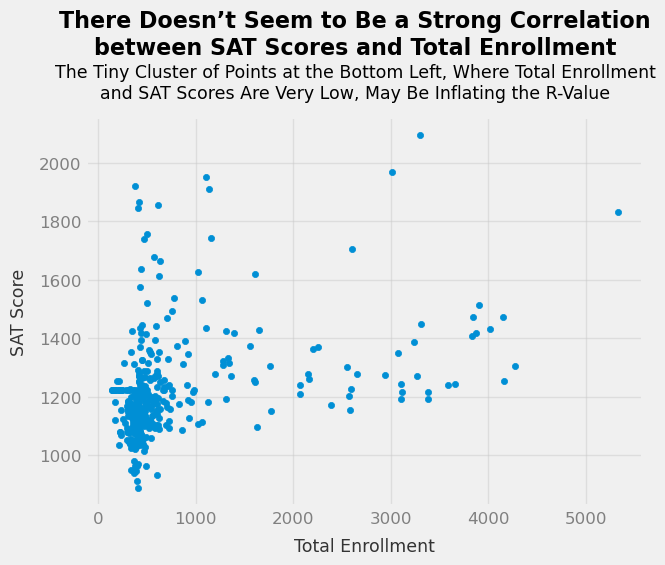

In [24]:
# Set the plot style to 'fivethirtyeight', and specify the figure size
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6.5, 4))

# Create a scatter plot of total enrollment against SAT scores
combined.plot.scatter(x='total_enrollment', y='sat_score')

# Add a main title and a subtitle
plt.suptitle('There Doesn’t Seem to Be a Strong Correlation\n\
between SAT Scores and Total Enrollment',
             ha="center", weight='bold', size=16, x=0.5, y=1.105)
plt.figtext(s="The Tiny Cluster of Points at the Bottom Left, Where Total Enrollment\n\
and SAT Scores Are Very Low, May Be Inflating the R-Value",
            ha="center", x=0.5, y=0.92, size=12.5)

# Customize ticks and gridlines for both axes, and add axes labels
plt.xticks(size=12, c='grey')
plt.yticks(size=12, c='grey')
plt.xlabel('Total Enrollment', c='#333333', labelpad=8, size=12.5)
plt.ylabel('SAT Score', c='#333333', labelpad=8, size=12.5)
plt.grid(alpha=0.5)

# Display the plot
plt.show()

There doesn't seem to be a strong correlation between SAT scores and total enrollment. Typically, in the presence of a strong correlation, all points would align closely. In this scatterplot, we observe a tiny cluster of high schools at the bottom left where total enrollment and SAT scores are less than `1000`, with other schools diverging in three distinct directions.

### 3.3. Exploring Schools with Low SAT Scores and Enrollment

The tiny cluster of points at the bottom left, where `total_enrollment` and `sat_score` are very low, may be inflating the r value. It's worth extracting the names of the high schools in this cluster for further research.

In [25]:
# Filter schools with total enrollment and SAT scores less than 1000
low_enrollment = combined[(combined["total_enrollment"] < 1000) & (combined["sat_score"] < 1000)]

# Extract school names from the filtered dataset
low_enrollment["School Name"]

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                  Unknown
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                  Unknown
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

Based on the school names alone, here are some possible characteristics of these high schools:

- Many schools have `International` in their name, suggesting a focus on global education, diverse student bodies, or foreign languages.
- Schools with names like `Bronx International` or `Brooklyn International` might indicate their location within New York City.
- Names like `International School for Liberal Arts` or `High School of World Cultures` hint at a specific academic focus.
- `It Takes a Village Academy` suggests a philosophy of community involvement in education, whereas `Multicultural High School` emphasizes cultural diversity.

### 3.4. Plotting Language Learning Percentage

Most of the high schools with low total enrollment and SAT scores exhibit high percentages of **English language learners (ELL)**. This suggests that it's also worth exploring the relationship between `ell_percent` and `sat_score`.

<Figure size 650x400 with 0 Axes>

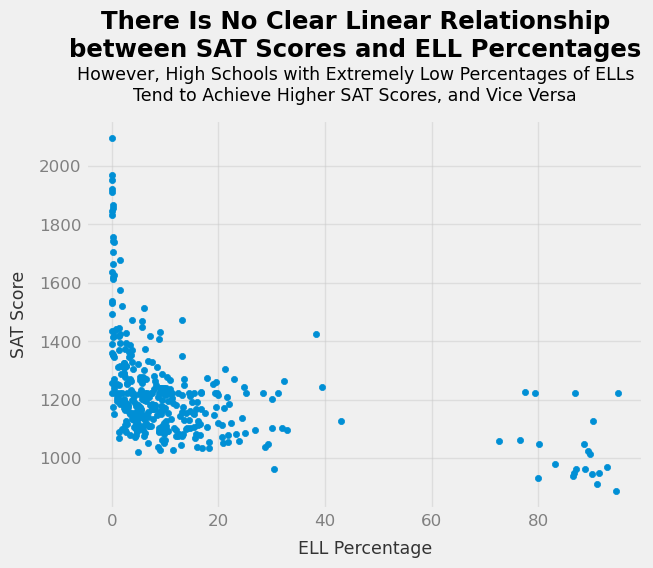

In [26]:
# Specify the figure size
plt.figure(figsize=(6.5, 4))

# Create a scatter plot of ELL percentage against SAT scores
combined.plot.scatter(x='ell_percent', y='sat_score')

# Add a main title and a subtitle
plt.suptitle('There Is No Clear Linear Relationship\n\
between SAT Scores and ELL Percentages',
             ha="center", weight='bold', size=17.5, x=0.5, y=1.11)
plt.figtext(s="However, High Schools with Extremely Low Percentages of ELLs\n\
Tend to Achieve Higher SAT Scores, and Vice Versa",
            ha="center", x=0.5, y=0.92, size=12.5)

# Customize ticks and gridlines for both axes, and add axes labels
plt.xticks(size=12, c='grey')
plt.yticks(size=12, c='grey')
plt.xlabel('ELL Percentage', c='#333333', labelpad=8, size=12.5)
plt.ylabel('SAT Score', c='#333333', labelpad=8, size=12.5)
plt.grid(alpha=0.5)

# Display the plot
plt.show()

There is no clear linear relationship between `sat_score` and `ell_percent`. In other words, the data points are not arranged in a manner that suggests a straight line could be fitted through them.

However, we observe a cluster of values where the ELL percentages exceed `70%`, and the SAT scores are below `1300`. This suggests that high schools with exceptionally high percentages of English language learners are more prone to scoring lower on the SAT test. On the other hand, the presence of a group of points with ELL percentages near `0%` and SAT scores starting from `1600` suggests that high schools with very low percentages of English language learners tend to achieve higher SAT scores.

### 3.5. Calculating District-Level Statistics

One way to enhance the readability of very granular statistics is through aggregation. In this case, we aggregate by school district to provide insights into how `ell_percent` fluctuates across districts, rather than the excessively detailed variation at the individual school level.

In [27]:
# Select numerical columns and assign the 'school_dist' column to the numeric dataset
combined_numeric = combined.select_dtypes(include=['number'])
combined_numeric["school_dist"] = combined["school_dist"]

# Group the numeric dataset by school district, and calculate the mean for each district
districts = combined_numeric.groupby("school_dist").mean()

# Reset the index to make 'school_dist' a regular column
districts.reset_index(inplace=True)

# Display the first few rows of the 'school_dist' and 'sat_score' columns
districts[['school_dist', 'sat_score']].head()

,school_dist,sat_score
0,01,1354.50
1,02,1295.64
2,03,1293.44
3,04,1224.14
4,05,1285.06


The average SAT scores across different school districts are as follows:

- District `01` appears to have the highest average SAT score, indicating potentially better academic performance or higher student preparation.
- District `04` shows the lowest average SAT score, suggesting challenges or disparities in academic achievement or resources.
- Districts `02`, `03`, and `05` have intermediate average SAT scores, indicating varying levels of academic performance or resource allocation compared to Districts `01` and `04`.

So far, we've identified and interpreted correlations between various pairs, leveraged scatter plots alongside correlation coefficients, and conducted analysis on a district level. Now, we're ready to delve deeper into the New York City high school data in `Part II`.

## 4. Conclusion

In summary, we decided to explore the correlation between SAT scores and demographics of NYC high schools to investigate the controversial efficacy of standardized tests and their potential biases against certain groups in the U.S. educational system.

We obtained several related datasets containing demographic information and test scores from the [NYC Open Data](https://opendata.cityofnewyork.us/) website. Moreover, we conducted background research on New York City, the SAT exam, schools in NYC, and our datasets to gain insight into how to effectively combine and analyze the data.

Our work in `Part I` of this project was divided into three main steps:

- The first key step involved obtaining and exploring various datasets about NYC public schools, preparing them to merge by cleaning the data. Along the way, we managed files with different formats and columns, converted columns from strings to numerical values, and employed text processing techniques to extract coordinates from strings.
- The second key step involved transforming all datasets into one clean and unified DataFrame, prepared for analysis. Throughout this process, we addressed missing values, condensed datasets, explored different types of merges, and calculated mean averages across DataFrames.
- The final, third step involved identifying and interpreting correlations between various pairs, and leveraging scatter plots alongside correlation coefficients. Additionally, we conducted district-level analysis.

Next, we're ready to delve deeper into the New York City high school data in `Part II`.